In [1]:
import numpy as np 
import pandas as pd 
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import math
%matplotlib inline
import holidays
from datetime import date
import seaborn as sns

In [2]:
#Reading our files
ch = pd.read_csv("C:/Users/arunk/Downloads/CH4_final_data.csv",header = 0, parse_dates = False)

In [3]:
ch.head(10)

,Year-Month,VALUE,AGRICULTURE,ENERGY,FUGITIVE EMISSION,MANUFATURING,WASTE,ELECTRICITY /HEAT,OTHER FUEL COMBUSTION,BULDING
0,1990-01,47.273,36.430,4.414,1.941,0.061,1.933,0.067,0.027,2.374
1,1990-02,46.960,36.384,4.394,1.929,0.060,1.919,0.067,0.026,2.375
2,1990-03,46.972,36.374,4.492,1.920,0.061,1.930,0.067,0.026,2.375
3,1990-04,46.923,36.202,4.401,1.908,0.061,1.888,0.067,0.028,2.376
4,1990-05,46.818,36.448,4.466,1.912,0.061,1.923,0.066,0.025,2.382
5,1990-06,47.318,36.317,4.381,1.939,0.064,1.931,0.067,0.028,2.381
6,1990-07,46.841,36.210,4.382,1.980,0.060,1.904,0.066,0.028,2.377
7,1990-08,46.997,36.419,4.427,1.927,0.062,1.894,0.067,0.029,2.373
8,1990-09,47.035,36.340,4.382,1.977,0.060,1.901,0.067,0.031,2.378
9,1990-10,47.197,36.319,4.385,1.955,0.061,1.895,0.067,0.028,2.378


In [4]:
ch.isnull().sum()

Year-Month               0
VALUE                    0
AGRICULTURE              0
ENERGY                   0
FUGITIVE EMISSION        0
MANUFATURING             0
WASTE                    0
ELECTRICITY /HEAT        0
OTHER FUEL COMBUSTION    0
BULDING                  0
dtype: int64

In [5]:
print(ch['VALUE'].nunique())   

349


In [6]:
ch['YEAR'] = pd.to_datetime(ch['Year-Month']).dt.year

In [23]:
ch['Month'] = pd.to_datetime(ch['Year-Month']).dt.month

In [24]:
ch.tail(10)

,Year-Month,VALUE,AGRICULTURE,ENERGY,FUGITIVE EMISSION,MANUFATURING,WASTE,ELECTRICITY /HEAT,OTHER FUEL COMBUSTION,BULDING,YEAR,lag1,Month
YEAR,,,,,,,,,,,,,
2019,2019-03,61.507,41.675,7.195,3.973,0.259,5.809,0.072,0.043,2.726,2019,61.520,3
2019,2019-04,61.727,41.648,7.179,3.961,0.260,5.772,0.073,0.043,2.728,2019,61.507,4
2019,2019-05,61.697,41.665,7.208,3.952,0.259,5.805,0.073,0.042,2.729,2019,61.727,5
2019,2019-06,61.639,41.648,7.149,3.928,0.265,5.756,0.072,0.042,2.726,2019,61.697,6
2019,2019-07,61.582,41.658,7.211,3.964,0.262,5.746,0.073,0.043,2.725,2019,61.639,7
2019,2019-08,61.515,41.641,7.160,3.944,0.264,5.746,0.072,0.043,2.726,2019,61.582,8
2019,2019-09,61.627,41.654,7.179,3.948,0.262,5.759,0.072,0.042,2.729,2019,61.515,9
2019,2019-10,61.665,41.654,7.203,3.962,0.259,5.806,0.072,0.043,2.730,2019,61.627,10
2019,2019-11,61.666,41.648,7.171,3.956,0.261,5.745,0.073,0.042,2.727,2019,61.665,11


In [9]:
#cleaning duplicates data
dup_rows = ch[ch.duplicated()]
print("no of duplicate rows:",dup_rows.shape)

no of duplicate rows: (0, 11)


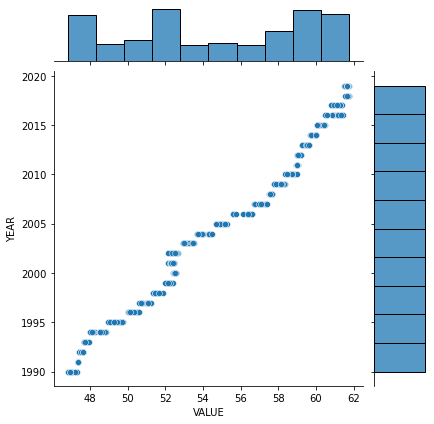

In [8]:
sns.jointplot(x='VALUE',y='YEAR', data=ch)

In [11]:
ch.describe()

,VALUE,AGRICULTURE,ENERGY,FUGITIVE EMISSION,MANUFATURING,WASTE,ELECTRICITY /HEAT,OTHER FUEL COMBUSTION,BULDING,YEAR
count,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000,360.000000
mean,54.763969,39.142042,5.612508,2.766611,0.141669,4.449333,0.602072,0.032578,2.592289,2004.500000
std,4.797843,1.686368,1.028534,0.780109,0.064772,1.248720,1.945027,0.009026,0.129219,8.667488
min,46.818000,36.196000,4.334000,1.801000,0.060000,1.888000,0.010000,0.015000,2.372000,1990.000000
25%,50.937000,37.670750,4.691750,2.066250,0.084000,3.744250,0.017750,0.025000,2.483000,1997.000000
50%,54.593500,39.233500,5.313000,2.519500,0.121000,4.956500,0.033500,0.031000,2.587000,2004.500000
75%,59.111750,40.630250,6.691250,3.587250,0.193250,5.329250,0.066000,0.039000,2.732000,2012.000000
max,61.750000,41.679000,7.213000,3.977000,0.265000,5.809000,8.343000,0.057000,2.755000,2019.000000


In [9]:
#lag feature
ch['lag1'] = ch['VALUE'].shift(1)
ch

,Year-Month,VALUE,AGRICULTURE,ENERGY,FUGITIVE EMISSION,MANUFATURING,WASTE,ELECTRICITY /HEAT,OTHER FUEL COMBUSTION,BULDING,YEAR,lag1
0,1990-01,47.273,36.430,4.414,1.941,0.061,1.933,0.067,0.027,2.374,1990,NaN
1,1990-02,46.960,36.384,4.394,1.929,0.060,1.919,0.067,0.026,2.375,1990,47.273
2,1990-03,46.972,36.374,4.492,1.920,0.061,1.930,0.067,0.026,2.375,1990,46.960
3,1990-04,46.923,36.202,4.401,1.908,0.061,1.888,0.067,0.028,2.376,1990,46.972
4,1990-05,46.818,36.448,4.466,1.912,0.061,1.923,0.066,0.025,2.382,1990,46.923
...,...,...,...,...,...,...,...,...,...,...,...,...
355,2019-08,61.515,41.641,7.160,3.944,0.264,5.746,0.072,0.043,2.726,2019,61.582
356,2019-09,61.627,41.654,7.179,3.948,0.262,5.759,0.072,0.042,2.729,2019,61.515
357,2019-10,61.665,41.654,7.203,3.962,0.259,5.806,0.072,0.043,2.730,2019,61.627
358,2019-11,61.666,41.648,7.171,3.956,0.261,5.745,0.073,0.042,2.727,2019,61.665


In [13]:
ch.groupby('YEAR')['VALUE'].mean()

YEAR
1990    47.015250
1991    47.354583
1992    47.560417
1993    47.790667
1994    48.405083
1995    49.335917
1996    50.336083
1997    50.903583
1998    51.522833
1999    52.195250
2000    52.498917
2001    52.357500
2002    52.454500
2003    53.182500
2004    54.149833
2005    55.025083
2006    56.254083
2007    57.074333
2008    57.586000
2009    58.069500
2010    58.716667
2011    58.995333
2012    59.114750
2013    59.446083
2014    59.853917
2015    60.258417
2016    61.032750
2017    61.121000
2018    61.683833
2019    61.624417
Name: VALUE, dtype: float64

<AxesSubplot:xlabel='lag1', ylabel='VALUE'>

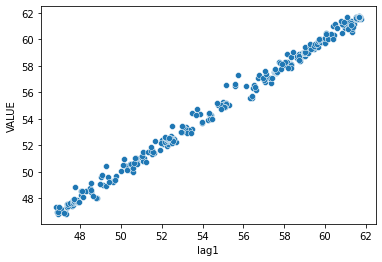

In [10]:
sns.scatterplot(x=ch['lag1'],y=ch['VALUE'] )

<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

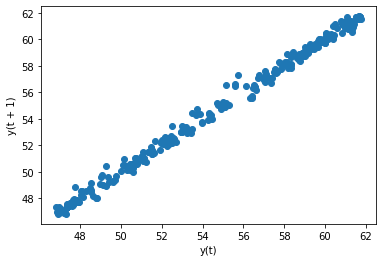

In [15]:
from pandas.plotting import lag_plot
lag_plot(ch['VALUE'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

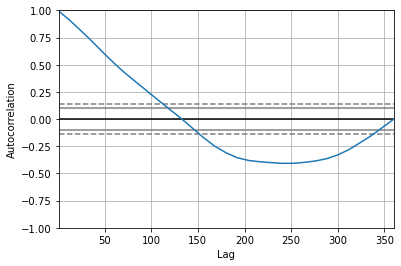

In [11]:
#Auto-correlation
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ch['VALUE'])

# Decomposing Time Series

In [12]:
import statsmodels as sm
import statsmodels.api as sm

In [13]:
from statsmodels.tsa.seasonal import seasonal_decompose
ch.index = ch['YEAR']

In [14]:
result = sm.tsa.seasonal_decompose(ch['VALUE'],  model ="additive" ,period=1)        #Additive model-y(t)=Level + Trend + Seasonality + Noise

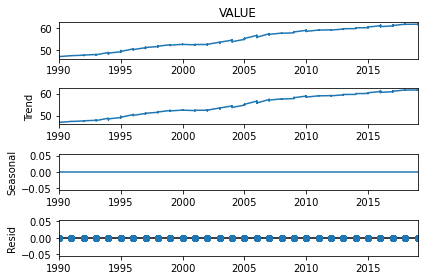

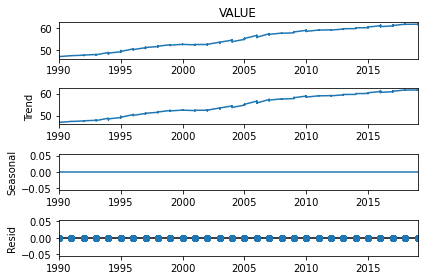

In [15]:
result.plot()

In [21]:
result_2 = sm.tsa.seasonal_decompose(ch['VALUE'],  model ="multiplicative" ,period=1)     #Multiplicative model-y(t)=Level * Trend * Seasonality * Noise

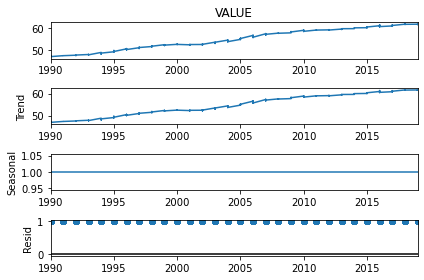

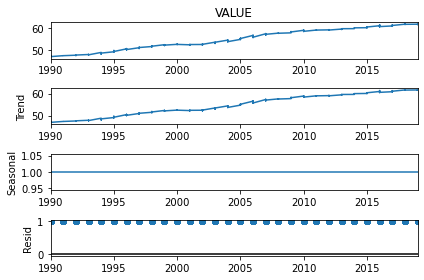

In [22]:
result_2.plot()

# Train-Test split

In [16]:
ch.shape

(360, 12)

In [17]:
ch['VALUE'].nunique()

349

In [18]:
train_size = int(ch.shape[0] * 0.8)    

In [19]:
training = ch[0:train_size]

In [20]:
training.shape

(288, 12)

In [21]:
testing = ch[train_size:]

In [22]:
testing.shape

(72, 12)

# Model-1:ARIMA(Autoregressive integrated moving average)

In [35]:
ch.index = ch['Year-Month']

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

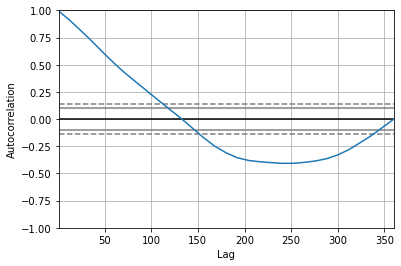

In [36]:
#Now to find auto-correlation function(acf)
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(ch['VALUE'])

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


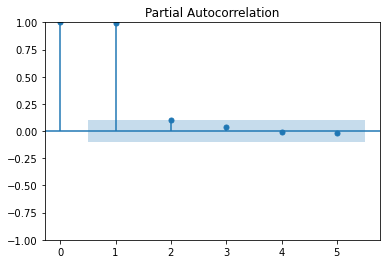

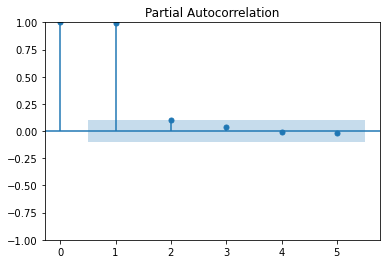

In [37]:
#Now to find partial auto-correlation function(pacf)
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(ch['VALUE'],lags=5)

In [38]:
from statsmodels.tsa.arima.model import ARIMA
ari_model = ARIMA(ch['VALUE'],order=(2,2,5))    #p-order of auto regression d-order of integration q-order of moving average

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [39]:
model_fits = ari_model.fit()

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [40]:
model_fits.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  VALUE   No. Observations:                  360
Model:                 ARIMA(2, 2, 5)   Log Likelihood                 -53.624
Date:                Wed, 12 Oct 2022   AIC                            123.248
Time:                        11:08:06   BIC                            154.292
Sample:                    01-01-1990   HQIC                           135.594
                         - 12-01-2019                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5134      0.485     -1.060      0.289      -1.463       0.436
ar.L2          0.4776      0.482      0.991      0.322      -0.467       1.422
ma.L1         -1.0024      0.474     -2.116      0.034      -1.931      -0.074
ma.L2         -0.8536      0.241     -3.542      0.000      -1.326      -0.381
ma.L3          1.0050      0.576      1.745      0.081      -0.124       2.134
ma.L4         -0.1038      0.240     -0.433      0.665      -0.574       0.366
ma.L5         -0.0178      0.130     -0.137      0.891      -0.272       0.237
sigma2         0.0771      0.004     17.199      0.000       0.068       0.086
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               125.98
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               0.56   Skew:                             0.70
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [41]:
residuals = model_fits.resid

<AxesSubplot:xlabel='Year-Month'>

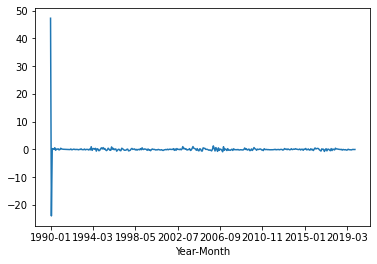

In [42]:
residuals.plot()

In [43]:
output = model_fits.forecast(120)       #wants next 100periods

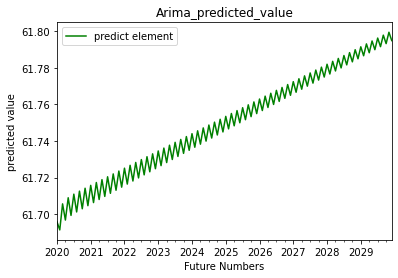

In [44]:
output.plot(color='green',title='Arima_predicted_value')
plt.xlabel("Future Numbers")
plt.ylabel("predicted value")
plt.legend(['predict element'])

In [45]:
model_fits.forecast(120)

2020-01-01    61.695835
2020-02-01    61.691336
2020-03-01    61.705598
2020-04-01    61.696731
2020-05-01    61.708938
                ...    
2029-08-01    61.791644
2029-09-01    61.797941
2029-10-01    61.793305
2029-11-01    61.799536
2029-12-01    61.794965
Freq: MS, Name: predicted_mean, Length: 120, dtype: float64

# Model-2: SARIMA(Seasonal Autoregressive integrated moving average)

In [56]:
from scipy import linalg
from numpy.linalg import LinAlgError

In [66]:
ch.index = ch['YEAR']

In [57]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.seasonal import seasonal_decompose

In [61]:
result = seasonal_decompose(ch['VALUE'],model='additive',period=10)

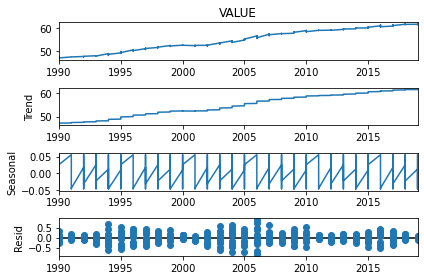

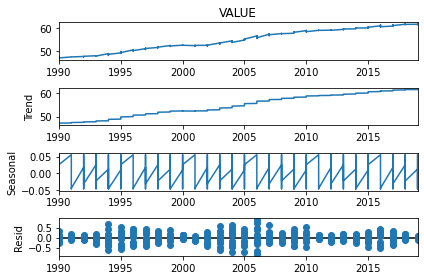

In [59]:
result.plot()

In [62]:
#using sarimax                          p d q                    p d q m 
sari_model = SARIMAX(ch['VALUE'],order=(2,2,5),seasonal_order = (1,1,1,10))            #p-lags d-differencing lags q-number of MA

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [63]:
model_fit = sari_model.fit()   

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [64]:
residual = model_fit.resid

Text(0, 0.5, 'Average Numbers')

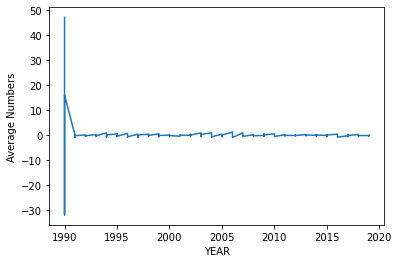

In [76]:
residual.plot()
plt.xlabel("YEAR")
plt.ylabel("Average Numbers")

In [77]:
op = model_fit.forecast(120)

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [78]:
model_fit.forecast(120)

C:\Users\arunk\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


360    61.740776
361    61.722072
362    61.760208
363    61.652852
364    61.719927
         ...    
475    61.059044
476    61.110031
477    61.055502
478    61.081550
479    61.016078
Name: predicted_mean, Length: 120, dtype: float64

In [79]:
#also find yhat
yhat = model_fit.predict()

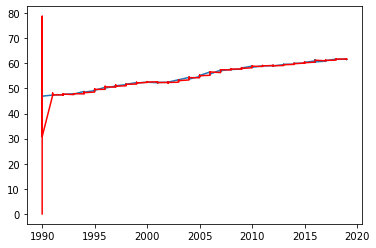

In [89]:
plt.plot(ch['VALUE'])
plt.plot(yhat,color='red')